#**Importe de Librerias**

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt



---



#**Definición de Funciones**

In [ ]:
# @title
def van_der_waals_isotherm(v, a, b, T):
    P = (R*T)/(v-b) - a/(v**2)
    return P

def van_der_waals_reduced(T, v):
  P = 8*T/(3*v - 1) - 3/(v**2)
  return P



---



#**Establecimiento de las condiciones**

In [120]:
# @title
materiales = ["H2", "H2O", "N2", "O2", "CO2"]
a = np.array([0.01945, 0.56539, 0.13882, 0.13983, 0.37186])
b = np.array([0.022, 0.031, 0.039, 0.032, 0.043])

R = 8.314

T_c = 8*a/(27*b*R)
T_R = np.transpose(np.array([T_c*0.5, T_c, 2*T_c]))

T = np.linspace(0.01, 0.1, 5) #Kelvin

v_isotherm = np.linspace(0.045, 0.5, 100)
P_isotherm = np.zeros((5,5,100))

v_R = np.linspace(0.34, 1, 100)
P_R = np.zeros((5, 3, 100))

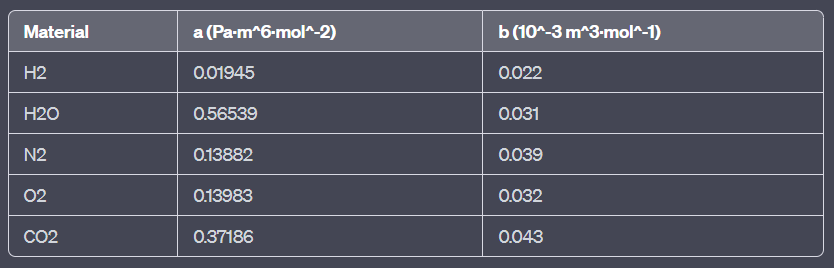




---



#**Ecuación de Van der Waals**

La ecuación de estado de Van der Waals es una mejora de la ecuación de estado de los gases ideales que tiene en cuenta las interacciones moleculares y el volumen ocupado por las moléculas reales. Esta ecuación corrige las limitaciones de la *Ley de los Gases Ideales*, que asume que las moléculas de gas no tienen volumen propio y no interactúan entre sí. En la realidad, las moléculas de gas tienen un volumen finito y experimentan fuerzas de atracción y repulsión intermoleculares.

$$(P+\frac{a}{v^2})(v-b)=RT$$

En la expresión se introducen dos parámetros adicionales, $a$ y $b$, que son específicos para cada gas y representan las fuerzas atractivas y el volumen ocupado por las moléculas. El término $a$ corrige la presión debido a las fuerzas de atracción entre las moléculas, mientras que $b$ corrige el volumen ocupado por las moléculas individuales.



---



#**Isotermas**

Resulta especialmente útil para describir el comportamiento de los gases a alta presión y baja temperatura, donde las fuerzas intermoleculares se vuelven significativas. En estas condiciones, los gases reales tienden a desviarse significativamente de la predicción de la Ley de los Gases Ideales.

La ecuación de Van der Waals predice la existencia de un punto crítico en el que la fase gaseosa y líquida se vuelven indistinguibles. En este punto, la densidad, la presión y la temperatura tienen valores críticos específicos. Las isotermas en un diagrama $PV$ de Van der Waals tienen un punto de inflexión en el punto crítico.

$$P=\frac{RT}{v-b}-\frac{a}{v^2}$$

In [121]:
# @title
for i in range(5):
  for j in range(5):
    P_isotherm[i,j] = van_der_waals_isotherm(v_isotherm, a[i], b[i], T[j])

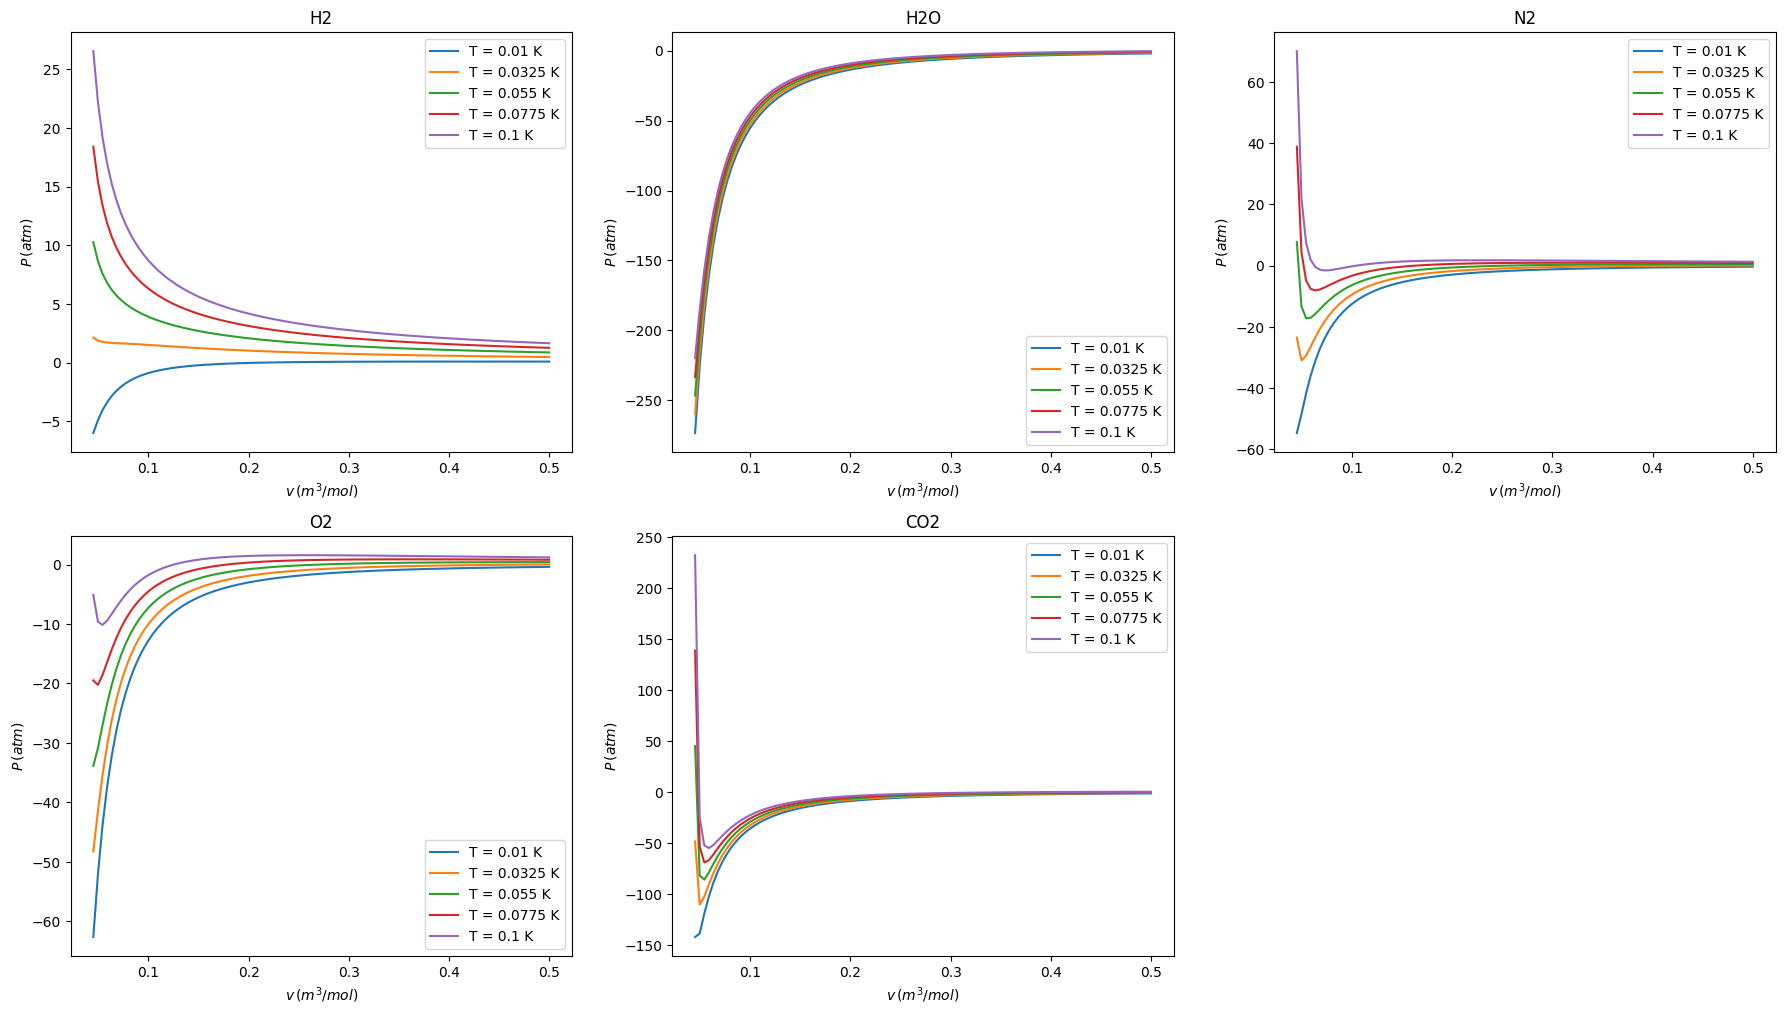

In [124]:
# @title
plt.figure(figsize = (22,12))

for i in range(5):
  plt.subplot(2,3,i+1)
  for j in range(5):
    plt.plot(v_isotherm, P_isotherm[i][j], label = f'T = {round(T[j], 4)} K')
  plt.legend()
  plt.title(materiales[i])
  plt.xlabel('$v\,(m^3/mol)$')
  plt.ylabel('$P\,(atm)$')

Algo de común observación es que a medida que el volumen disminuía, se apreciaba con más detalle la inflexión de las curvas. Esta inflexión en todos los casos requirió alcanzar valores de presión negativos al que no se encontró sentido físico.

En general, a bajos volumenes, la presión se dispara y a medida que la temperatura crece un poco, su punto mínimo de presión se hace más negativo. La tendencia a medida que aumenta el volumen, la curva en el diagrama se hace plana.

1. **Hidrógeno (H2)**:
   - A bajas presiones y temperaturas, el hidrógeno sigue aproximadamente el comportamiento de un gas ideal, por lo que su isoterma se asemejará a una línea recta en el diagrama \(PV\).
   - A medida que aumentas la presión y disminuyes la temperatura, el hidrógeno mostrará desviaciones significativas de la Ley de Gases Ideales debido a sus fuerzas intermoleculares más débiles. La isoterma se curvará hacia arriba.

2. **Agua (H2O)**:
   - El agua tiene fuerzas intermoleculares fuertes debido a su polaridad. A bajas temperaturas, el agua exhibirá desviaciones significativas de la Ley de Gases Ideales y su isoterma se curvará hacia arriba a medida que aumenta la presión; sin embargo, su punto de inflexión requiere volumene menores para ser observado.
   - A temperaturas más altas, el agua se comportará de manera más ideal, y su isoterma se asemejará más a una línea recta a presiones moderadas.

3. **Nitrógeno (N2)**:
   - El nitrógeno a bajas presiones y temperaturas se comporta de manera casi ideal, por lo que su isoterma se parecerá a una línea recta en el diagrama PV.
   - A medida que aumenta la presión y disminuye la temperatura, el nitrógeno mostrará desviaciones de la Ley de Gases Ideales. La isoterma se curvará hacia arriba, pero estas desviaciones son menos pronunciadas que en otros gases.

4. **Dióxido de Carbono (CO2)**:
   - El CO2, como el agua, tiene fuerzas intermoleculares significativas debido a su estructura molecular.
   - A bajas temperaturas y altas presiones, el CO2 mostrará desviaciones notables de la idealidad y su isoterma se curvará hacia arriba.

5. **Oxígeno (O2)**:
   - El oxígeno, al igual que el nitrógeno, se comporta de manera casi ideal a bajas presiones y temperaturas, por lo que su isoterma se parecerá a una línea recta.
   - A temperaturas más bajas y a presiones más altas, el oxígeno también mostrará desviaciones de la Ley de Gases Ideales y su isoterma se curvará hacia arriba.



---




#**Puntos Críticos**

En la ecuación de Van der Waals, los puntos críticos son condiciones especiales en las que un gas experimenta una transición de fase entre una fase gaseosa y una fase líquida a temperaturas y presiones críticas específicas. En el punto crítico, las propiedades del gas (como la densidad, la presión y la temperatura) tienen valores críticos que son independientes del tipo de gas, pero dependen de la molécula en cuestión.

Los puntos críticos son importantes porque marcan las condiciones límite en las que un gas puede existir como una sola fase, y más allá de estas condiciones, las fases gaseosa y líquida se vuelven indistinguibles.

1. **Temperatura Crítica $T_c$**: La temperatura crítica es la temperatura más alta a la cual un gas puede existir en fase líquida en el equilibrio con su fase gaseosa. Por encima de esta temperatura, el gas no puede condensarse en líquido, independientemente de la presión. La temperatura crítica se denota como $T_c$ y es una propiedad específica del gas.

$$\frac{\partial P}{\partial v}=\frac{2a}{v^3}-\frac{RT}{(v-b)^2}=0$$

$$T_c=\frac{2a(v-b)^2}{Rv^3}$$

2. **Presión Crítica $P_c$**: La presión crítica es la presión más alta a la cual un gas puede existir en fase líquida en el equilibrio con su fase gaseosa a la temperatura crítica. La presión crítica se denota como \(P_c\) y también es una propiedad específica del gas.

3. **Volumen Crítico $v_c$**: El volumen crítico es el volumen específico (volumen por unidad de masa o volumen molar) a la temperatura y presión críticas. Se denota como $v_c$.


$$\frac{\partial^2 P}{\partial v^2}=\frac{2RT}{(v-b)^3}-\frac{6a}{v^4}\\ \hspace{2.3cm}=\frac{4a}{v^3(v-b)}-\frac{6a}{v^4}=0$$

$$v_c=3b\hspace{2cm}T_c=\frac{8a}{27bR}\hspace{2cm}P=\frac{a}{27b^2}$$




---



#**Ecuación Reducida**

La ecuación reducida es una forma normalizada de expresar las ecuaciones de estado termodinámicas para gases y líquidos. Esta forma normalizada es útil en la termodinámica y la física de fluidos porque permite comparar el comportamiento de diferentes sustancias sin tener en cuenta las unidades específicas de medida o las propiedades moleculares individuales.

$$P=P_RP_c\hspace{1cm}v=v_Rv_c\hspace{1cm}T=T_RT_c$$

$$(\frac{aP_R}{27b^2}+\frac{a}{9b^2v_R^2})(3bv_R-b)=\frac{8aT_R}{27b}$$

Es especialmente útil para representar el comportamiento de gases y líquidos en gráficos y diagramas dimensionales reducidos, lo que facilita la visualización y la comparación de las propiedades termodinámicas de diferentes sustancias. También permite la identificación de comportamientos universales compartidos por diversas sustancias cuando se encuentran cerca de su punto crítico.

$$(P_R+\frac{3}{v_R^2})(3v_R-1)=8T_R$$

In [126]:
# @title
for i in range(5):
  for j in range(3):
    P_R[i,j] = van_der_waals_reduced(T_R[i, j], v_R)

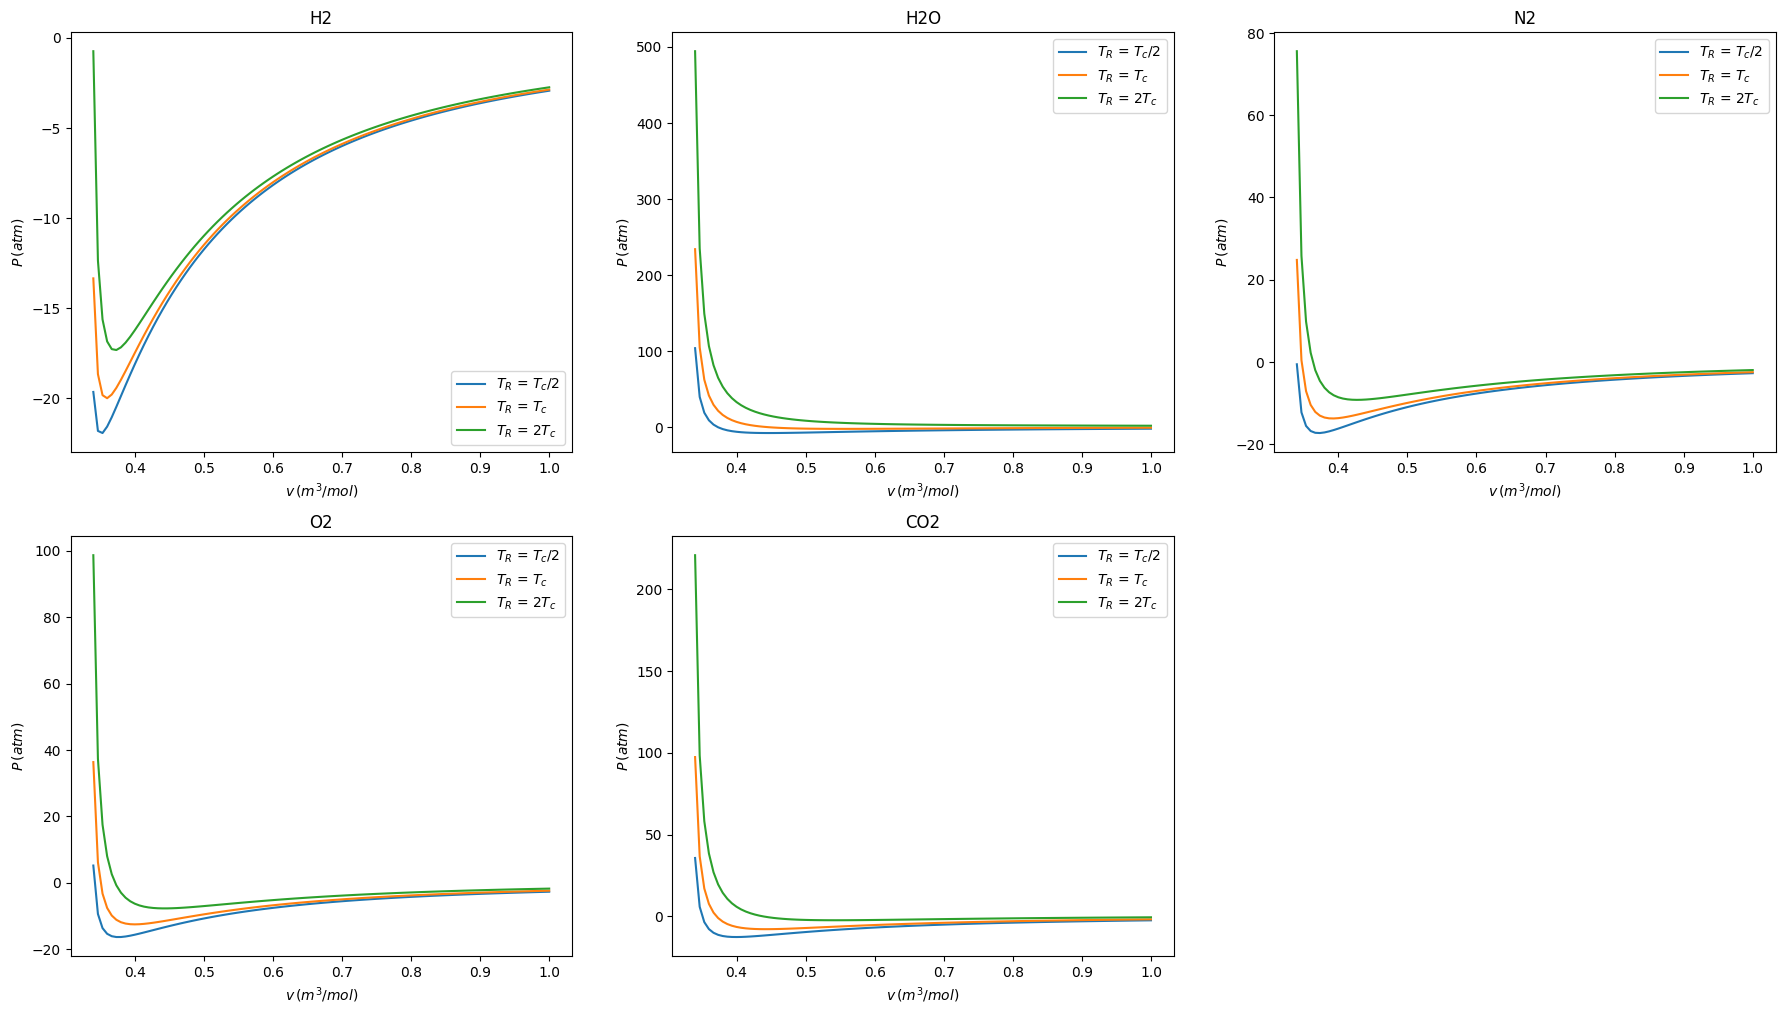

In [127]:
# @title
Ts = ['$T_c/2$', '$T_c$', '$2T_c$']

plt.figure(figsize = (22,12))

for i in range(5):

  for j in range(3):
    plt.subplot(2,3,i+1)
    plt.plot(v_R, P_R[i,j], label = f'$T_R$ = {Ts[j]}')
  plt.legend()
  plt.title(materiales[i])
  plt.xlabel('$v\,(m^3/mol)$')
  plt.ylabel('$P\,(atm)$')

plt.show()

La discusión sobre cada uno de los diagramas es similar a la realizada en la sección anterior.

Cuando la ecuación reducida de Van der Waals indica tres posibles valores de $v_R$ para un solo valor de $P_R$ y $T_R$, esto significa que hay tres estados de la materia que coexisten en equilibrio a esa combinación particular de presión y temperatura.

1. **Fase Gaseosa**: En este estado, las partículas del gas están relativamente dispersas y tienen una densidad reducida baja.

2. **Fase Líquida**: En esta fase, las partículas están más cercanas unas a otras y tienen una densidad reducida mayor que en la fase gaseosa.

3. **Fase Sólida**: En esta fase, las partículas están muy cercanas unas a otras y tienen la mayor densidad reducida de las tres fases.

Esto sugiere que estas condiciones representan un punto triple en el diagrama de fase reducido. En el punto triple, las tres fases coexisten en equilibrio, y las propiedades termodinámicas (presión, temperatura, volumen) son constantes y únicas para ese punto en particular.